In [2]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime



workdir = "C://Users//a//Desktop//Ronny_TF//Ronny_IC50_RMSE//dataset"

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# 출처: https://3months.tistory.com/206 [Deep Play]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13646180919291708635
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9234234737
locality {
  bus_id: 1
}
incarnation: 8443092195618164571
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
dataset = np.load(workdir + "//190320_cls4_druginfo_change.npz")
ss0 = np.load(workdir + '//190315_shuffle_split_r0.npz')

In [5]:
x = dataset['x']
y = dataset['y_lnIC50']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [6]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [7]:
# In[15]:
ab =[]
for i in range(50,100):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

1 33


In [8]:
x.shape

(160375, 23538)

In [9]:
training_image_array.shape

(144338, 23538)

In [10]:
# In[21]:

num_classes = 1
learning_rate = 0.002
training_epochs = 5
batch_size = 101
img_rows, img_cols = 154, 154


In [11]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [12]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(144338, 23538) (144338,) (16037, 23538) (16037,)


In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (144338, 23538)
144338 train samples
16037 test samples


In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR
import numpy as np
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt

# #############################################################################
# Fit regression model
regr = LinearSVR(random_state=0)

In [16]:
model = regr.fit(train_X, training_label_array)

In [17]:
predicted_classes = model.predict(test_X)

In [18]:
predicted_value = predicted_classes

In [19]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [20]:
workdir = "C://Users//a//Desktop//Ronny_TF//Ronny_Deep_vs_CDRscan//190514_linear_svr"
c.to_csv(workdir + '//190514_linear_svr_result.csv')

In [21]:
c

,Predicted,Test
0,0.578944,1.158653
1,4.811257,5.321962
2,1.938227,3.624203
3,4.898192,3.054980
4,-3.217827,-3.985187
5,6.211741,5.948850
6,3.790306,3.928832
7,-1.731634,-2.823335
8,4.209158,4.139350
9,1.155494,1.180256


In [22]:
predicted_value.shape

(16037,)

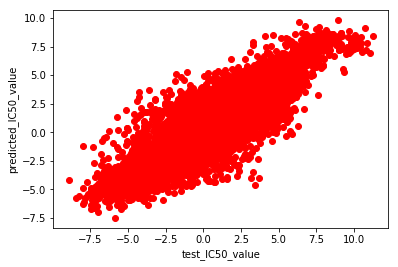

In [23]:
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//190514_linear_svr_test_scatterplot.png')

In [24]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.3137164392661047


In [25]:
from sklearn.metrics import r2_score
r2_value = r2_score(b, a) 
print(r2_value)

0.778686217701157
